In [5]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt

from sklearn.svm import SVC

CV train 0.9766666666666668


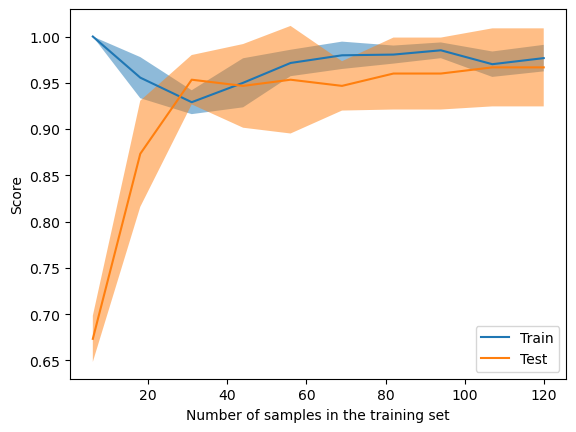

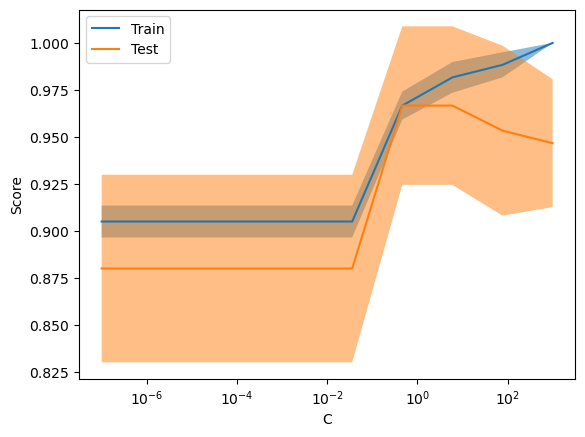

In [8]:
# Iris init curves

X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = SVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves

ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

CV mean score with optimal params is  0.9933333333333334


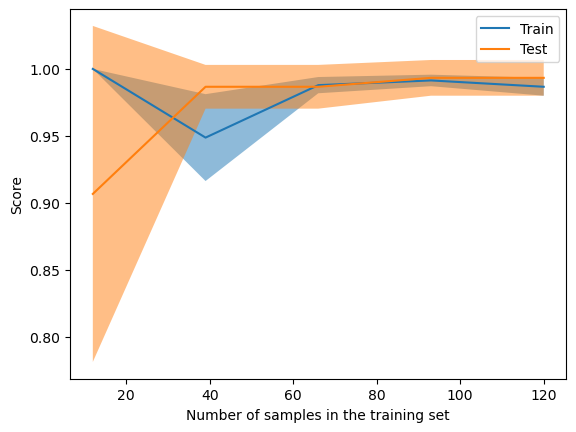

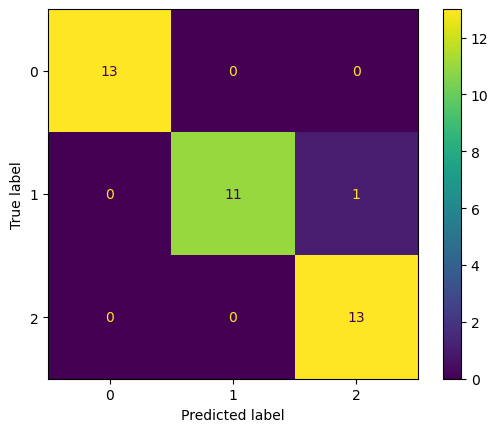

In [29]:
# Iris optimal

# shuffled dataset
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = make_pipeline(SVC(C=6.0))
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with optimal params is ", scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y)


# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

CV train 0.9863803740119529


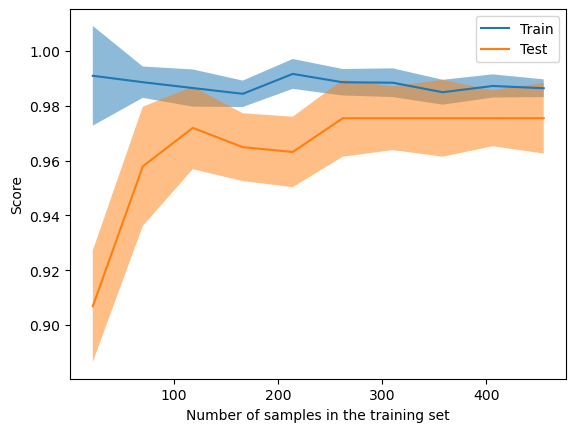

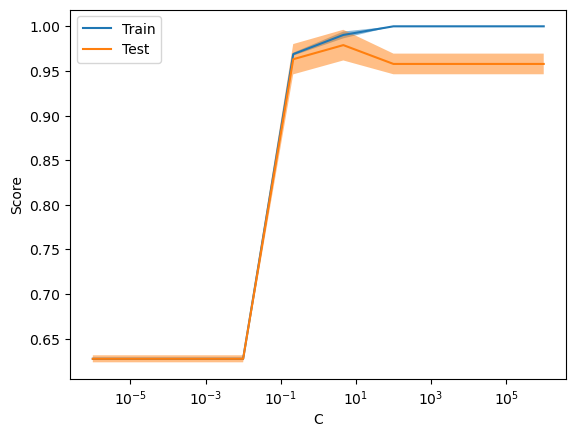

In [9]:
# BC init curves

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = SVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("CV train", train_scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves

ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="C", param_range=np.logspace(-6, 6, 10)
)

CV mean score with optimal params is  0.9719298245614034


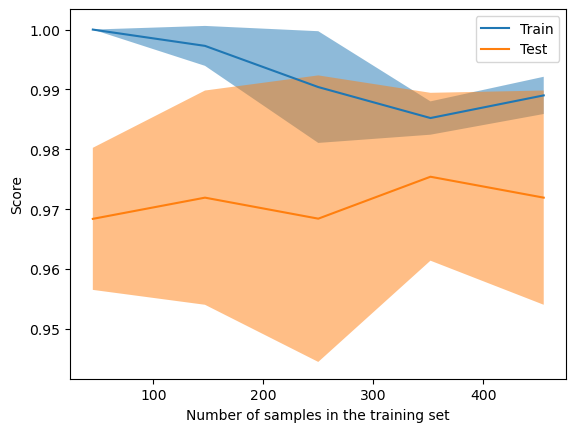

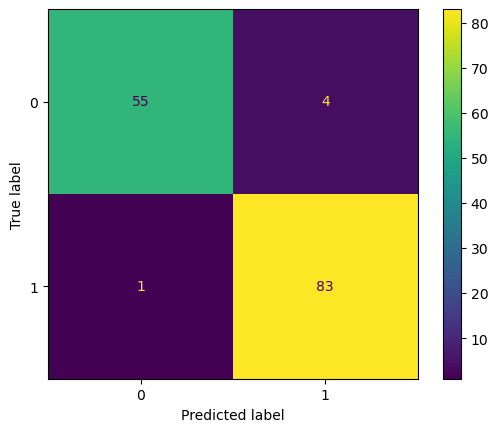

In [31]:
# BC optimal

# shuffled dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = make_pipeline(StandardScaler(), SVC(C=.46, kernel= 'linear'))
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
print("CV mean score with optimal params is ", scores.mean())

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y)


# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

In [26]:
# iris with grid searched params
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

params = {'C': np.logspace(-7, 3, 10), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(SVC(), params)

# find best params
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = StandardScaler().fit_transform(X_train)

gs.fit(X_train, y_train)


print(gs.best_params_)



{'C': 5.994842503189421, 'kernel': 'linear'}


In [28]:
# BC with grid searched params
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

params = {'C': np.logspace(-7, 3, 10), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(SVC(), params)

# find best params
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = StandardScaler().fit_transform(X_train)

gs.fit(X_train, y_train)


print(gs.best_params_)



{'C': 0.4641588833612782, 'kernel': 'linear'}


In [3]:
# optimal params

# iris
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
# X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = SVC(C = 10.0, kernel = 'linear')
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)

CV test score: 0.9733333333333334
training time: 0.0004338741302490234


In [4]:
# optimal params

# BC
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = SVC(C = .1, kernel = 'linear')
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
f1_results = cross_validate(clf, X, y, scoring = 'f1')
f1_score = f1_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("f1 test score:", f1_score)
print("training time:", fit_time)

CV test score: 0.9771929824561404
f1 test score: 0.9820853526052143
training time: 0.0048755168914794925


<Figure size 1000x600 with 0 Axes>

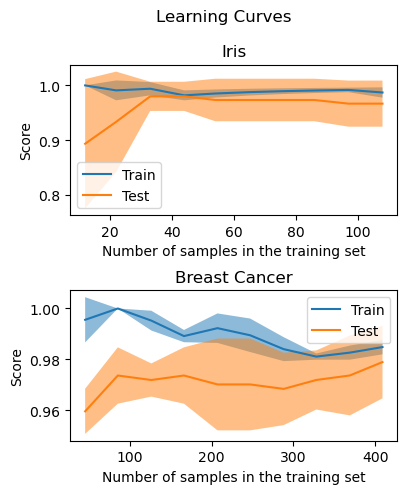

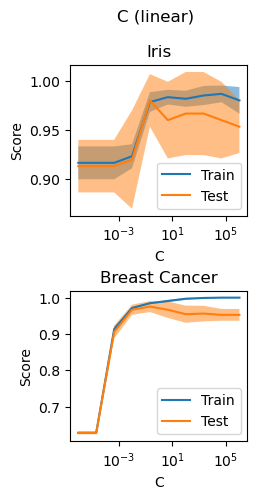

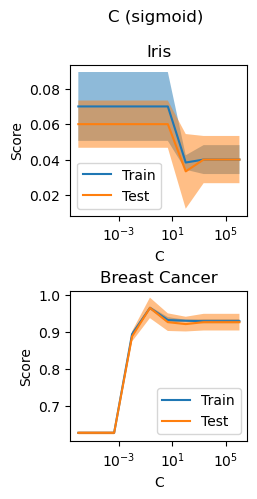

In [6]:
# final curves

# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

clf1 = SVC(C = 10.0, kernel = 'linear')
clf2 = SVC(C = .1, kernel = 'linear')


# learning curves
plt.figure(figsize=(10,6))
fig1, axs1 = plt.subplots(2)
fig1.set_figwidth(4)
fig1.suptitle("Learning Curves")
axs1[0].set_title("Iris")
axs1[1].set_title("Breast Cancer")
fig1.tight_layout()
fig1.subplots_adjust(hspace = .5)
LearningCurveDisplay.from_estimator(clf1, iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0])
LearningCurveDisplay.from_estimator(clf2, 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1])

axs1[0].legend()
axs1[1].legend()


# Validation curves

# C parameter
fig2, axs2 = plt.subplots(2)
fig2.suptitle("C (linear)")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'linear'),
    iris_x, iris_y, param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs2[0]
)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'linear'),
 bc_x, bc_y, param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs2[1]
)

fig3, axs3 = plt.subplots(2)
fig3.suptitle("C (sigmoid)")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.set_figwidth(2)
fig3.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'sigmoid'),
    iris_x, iris_y, param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs3[0]
)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'sigmoid'),
 bc_x, bc_y,  param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs3[1]
)


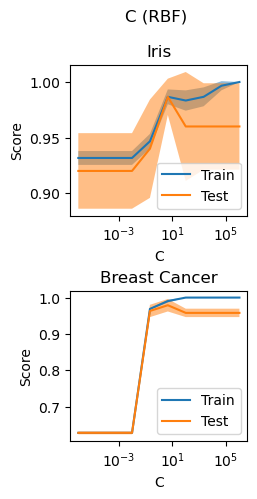

In [3]:
iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)
bc_x = StandardScaler().fit_transform(bc_x) 

fig3, axs3 = plt.subplots(2)
fig3.suptitle("C (RBF)")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.set_figwidth(2)
fig3.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'rbf'),
    iris_x, iris_y, param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs3[0]
)

ValidationCurveDisplay.from_estimator(SVC(kernel = 'rbf'),
 bc_x, bc_y,  param_name="C", param_range=np.logspace(-6, 6, 10), ax = axs3[1]
)